In [ ]:
import cv2
from PIL import Image

# Load image using OpenCV
image = cv2.imread('input.jpg')

cv2.imwrite('compressed.jpg', image, [int(cv2.IMWRITE_JPEG_QUALITY), 50])

# Compare file sizes
import os

original_size = os.path.getsize('input.jpg')
compressed_size = os.path.getsize('compressed.jpg')

print(f"Original Size: {original_size / 1024:.2f} KB")
print(f"Compressed Size: {compressed_size / 1024:.2f} KB")

Original Size: 79.87 KB
Compressed Size: 32.05 KB


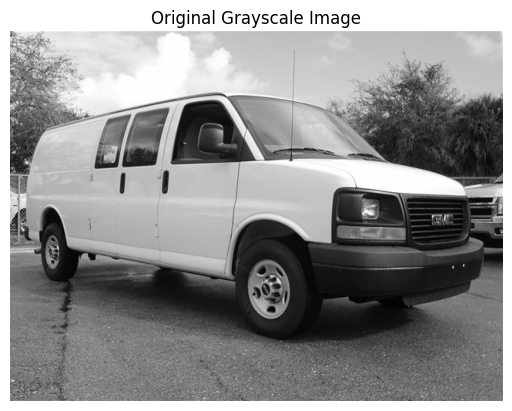

In [ ]:
image = cv2.imread('input.jpg', cv2.IMREAD_GRAYSCALE)  # Load image in grayscale

plt.imshow(image, cmap='gray')
plt.title("Original Grayscale Image")
plt.axis('off')
plt.show()


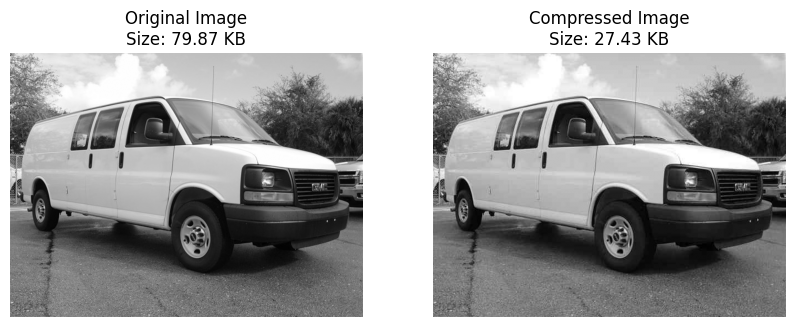

Original Size: 81790 bytes
Compressed Size: 28092 bytes
Compression Ratio: 291.15%


In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

def divide_into_blocks(image, block_size=8):
    h, w = image.shape
    blocks = []
    for i in range(0, h, block_size):
        for j in range(0, w, block_size):
            block = image[i:i+block_size, j:j+block_size]
            if block.shape == (block_size, block_size):
                blocks.append(block)
    return blocks

def apply_dct(block):
    return cv2.dct(np.float32(block))

def quantize(block, q_matrix, scale_factor=1.5):  # Adjust for better compression
    return np.round(block / (q_matrix * scale_factor))

def dequantize(block, q_matrix, scale_factor=1.5):
    return block * (q_matrix * scale_factor)

def apply_idct(block):
    return cv2.idct(np.float32(block))

def merge_blocks(blocks, image_shape, block_size=8):
    h, w = image_shape
    reconstructed_image = np.zeros((h, w))
    block_index = 0
    for i in range(0, h, block_size):
        for j in range(0, w, block_size):
            if block_index < len(blocks):
                reconstructed_image[i:i + block_size, j:j + block_size] = blocks[block_index]
                block_index += 1
            else:
                break
    return np.clip(reconstructed_image, 0, 255)

# Load and preprocess image
image = cv2.imread('input.jpg', cv2.IMREAD_GRAYSCALE)
original_size = os.path.getsize('input.jpg')  # Get actual file size in bytes

blocks = divide_into_blocks(image)

quant_matrix = np.array([
    [16, 11, 10, 16, 24, 40, 51, 61],
    [12, 12, 14, 19, 26, 58, 60, 55],
    [14, 13, 16, 24, 40, 57, 69, 56],
    [14, 17, 22, 29, 51, 87, 80, 62],
    [18, 22, 37, 56, 68, 109, 103, 77],
    [24, 35, 55, 64, 81, 104, 113, 92],
    [49, 64, 78, 87, 103, 121, 120, 101],
    [72, 92, 95, 98, 112, 100, 103, 99]
])

dct_blocks = [apply_dct(block) for block in blocks]
quantized_blocks = [quantize(block, quant_matrix) for block in dct_blocks]

dequantized_blocks = [dequantize(block, quant_matrix) for block in quantized_blocks]
reconstructed_blocks = [apply_idct(block) for block in dequantized_blocks]

# Convert back to uint8
reconstructed_image = merge_blocks(reconstructed_blocks, image.shape)
compressed_image_uint8 = np.uint8(reconstructed_image)

cv2.imwrite("compressed.jpg", compressed_image_uint8, [cv2.IMWRITE_JPEG_QUALITY, 50])  # Set JPEG Quality to 50%

compressed_size = os.path.getsize("compressed.jpg")

compression_ratio = (original_size / compressed_size) * 100

# Display images
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.imshow(image, cmap='gray')
plt.title(f"Original Image\nSize: {original_size / 1024:.2f} KB")
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(compressed_image_uint8, cmap='gray')
plt.title(f"Compressed Image\nSize: {compressed_size / 1024:.2f} KB")
plt.axis('off')

plt.show()

print(f"Original Size: {original_size} bytes")
print(f"Compressed Size: {compressed_size} bytes")
print(f"Compression Ratio: {compression_ratio:.2f}%")

In [ ]:
import cv2
import os

image = cv2.imread('input.jpg')

cv2.imwrite('compressed.png', image, [int(cv2.IMWRITE_PNG_COMPRESSION), 9])

# Compare file sizes
original_size = os.path.getsize('input.jpg')
compressed_size = os.path.getsize('compressed.png')
compression_ratio = compressed_size / original_size * 100

print(f"Original Size: {original_size / 1024:.2f} KB")
print(f"Compressed Size: {compressed_size / 1024:.2f} KB")
print(f"Compression Ratio: {compression_ratio:.2f}%")

Original Size: 79.87 KB
Compressed Size: 383.22 KB
Compression Ratio: 479.78%


In [ ]:
cv2.imwrite('compressed_lossless.png', image, [cv2.IMWRITE_PNG_COMPRESSION, 9])

True

In [ ]:
import cv2

image = cv2.imread("input.jpg")
cv2.imwrite("reconverted.jpg", image, [cv2.IMWRITE_JPEG_QUALITY, 95])

original_jpg_size = os.path.getsize("input.jpg")
reconverted_jpg_size = os.path.getsize("reconverted.jpg")
png_size = os.path.getsize("compressed_lossless.png")

print(f"Original JPEG Size: {original_jpg_size} bytes")
print(f"Reconverted JPEG Size: {reconverted_jpg_size} bytes")
print(f"PNG Compressed Size: {png_size} bytes")

Original JPEG Size: 81790 bytes
Reconverted JPEG Size: 116722 bytes
PNG Compressed Size: 177939 bytes


Original Image Size: 106.42 KB
Compressed Image Size: 106.47 KB
Compression Ratio: 1.00


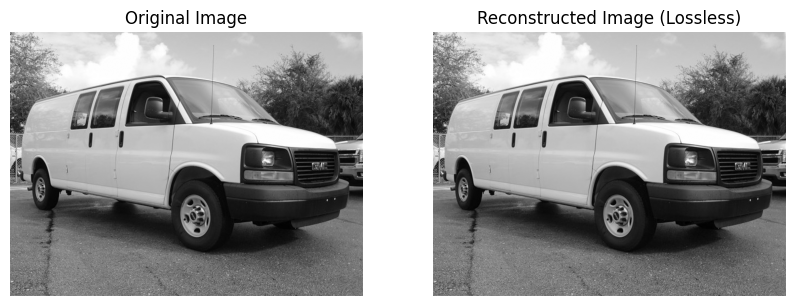

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

def blockwise_dct(image, block_size=8):
    """Applies DCT block-wise to an image."""
    h, w = image.shape
    dct_image = np.zeros_like(image, dtype=np.float32)

    for i in range(0, h, block_size):
        for j in range(0, w, block_size):
            block = image[i:i + block_size, j:j + block_size]
            dct_block = cv2.dct(np.float32(block))
            dct_image[i:i + block_size, j:j + block_size] = dct_block

    return dct_image

def blockwise_idct(dct_image, block_size=8):
    """Applies Inverse DCT block-wise to an image."""
    h, w = dct_image.shape
    image_reconstructed = np.zeros_like(dct_image, dtype=np.float32)

    for i in range(0, h, block_size):
        for j in range(0, w, block_size):
            dct_block = dct_image[i:i + block_size, j:j + block_size]
            block = cv2.idct(dct_block)
            image_reconstructed[i:i + block_size, j:j + block_size] = block

    return image_reconstructed

image_path = "input.jpg"
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

if image is None:
    print(f"Error: Could not load image from {image_path}. Please check the file path.")
    exit()

# Pad the image to make its dimensions a multiple of 8
h, w = image.shape
new_h = (h + 7) // 8 * 8
new_w = (w + 7) // 8 * 8
padded_image = cv2.copyMakeBorder(image, 0, new_h - h, 0, new_w - w, cv2.BORDER_CONSTANT, value=0)

# Apply DCT
dct_image = blockwise_dct(padded_image)

# Apply Inverse DCT (without quantization)
image_reconstructed = blockwise_idct(dct_image)

# Remove padding
image_reconstructed = image_reconstructed[:h, :w]

# Clip values and convert to uint8
image_reconstructed = np.clip(image_reconstructed, 0, 255).astype(np.uint8)

# Save and compare file sizes
original_image_path = "input.jpg"
cv2.imwrite(original_image_path, image)

compressed_image_path = "compressed_lossless.jpg"
cv2.imwrite(compressed_image_path, image_reconstructed)

original_size = os.path.getsize(original_image_path)
compressed_size = os.path.getsize(compressed_image_path)

print(f"Original Image Size: {original_size / 1024:.2f} KB")
print(f"Compressed Image Size: {compressed_size / 1024:.2f} KB")
print(f"Compression Ratio: {original_size / compressed_size:.2f}")

# Display images
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(image_reconstructed, cmap='gray')
plt.title('Reconstructed Image (Lossless)')
plt.axis('off')

plt.show()

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Load MNIST dataset
mnist = keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train, x_test = x_train / 255.0, x_test / 255.0

x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

# Convert labels to categorical (one-hot encoding)
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
model = Sequential([
    Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(28,28,1)),
    MaxPooling2D(pool_size=(2,2)),
    Conv2D(64, kernel_size=(3,3), activation='relu'),
    MaxPooling2D(pool_size=(2,2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')  # Output layer for 10 classes
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# Train model with 80-20 train-test split
history = model.fit(x_train, y_train, epochs=10, batch_size=64, validation_data=(x_test, y_test))

Epoch 1/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 55s 58ms/step - accuracy: 0.9954 - loss: 0.0130 - val_accuracy: 0.9934 - val_loss: 0.0243
Epoch 2/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 82s 58ms/step - accuracy: 0.9959 - loss: 0.0115 - val_accuracy: 0.9925 - val_loss: 0.0275
Epoch 3/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 82s 58ms/step - accuracy: 0.9962 - loss: 0.0122 - val_accuracy: 0.9931 - val_loss: 0.0256
Epoch 4/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 54s 57ms/step - accuracy: 0.9956 - loss: 0.0132 - val_accuracy: 0.9935 - val_loss: 0.0256
Epoch 5/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 82s 57ms/step - accuracy: 0.9963 - loss: 0.0108 - val_accuracy: 0.9928 - val_loss: 0.0299
Epoch 6/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 54s 58ms/step - accuracy: 0.9964 - loss: 0.0102 - val_accuracy: 0.9922 - val_loss: 0.0328
Epoch 7/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 80s 56ms/step - accuracy: 0.9970 - loss: 0.0098 - val_accuracy: 0.9928 - val_loss: 0.0295
Epoch 8/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 83s 58ms/step - accuracy: 0.9966 - loss: 0.0089 - 

In [ ]:
# Predict on test set
y_pred_probs = model.predict(x_test)  # Get class probabilities
y_pred_classes = np.argmax(y_pred_probs, axis=1)  # Convert probabilities to class labels
y_true_classes = np.argmax(y_test, axis=1)  # Convert one-hot labels to class labels

# Calculate evaluation metrics
accuracy = accuracy_score(y_true_classes, y_pred_classes)
precision = precision_score(y_true_classes, y_pred_classes, average='macro')
recall = recall_score(y_true_classes, y_pred_classes, average='macro')
f1 = f1_score(y_true_classes, y_pred_classes, average='macro')

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step
Accuracy: 0.9936
Precision: 0.9936
Recall: 0.9936
F1 Score: 0.9936


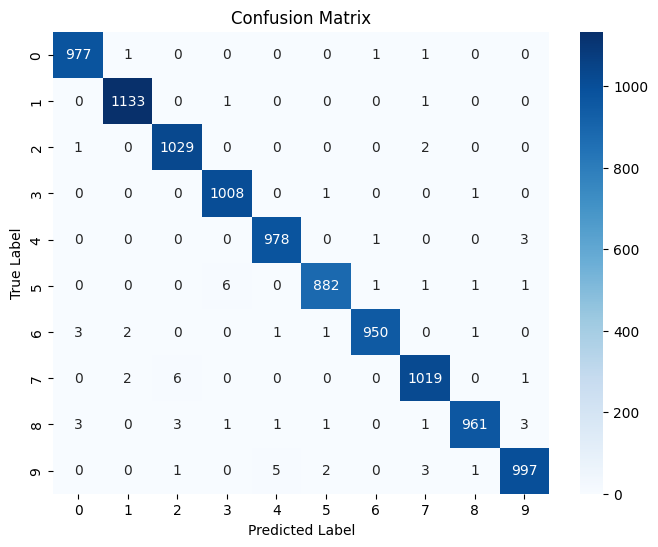

In [ ]:
# confusion matrix
conf_matrix = confusion_matrix(y_true_classes, y_pred_classes)

plt.figure(figsize=(8,6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d', xticklabels=range(10), yticklabels=range(10))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

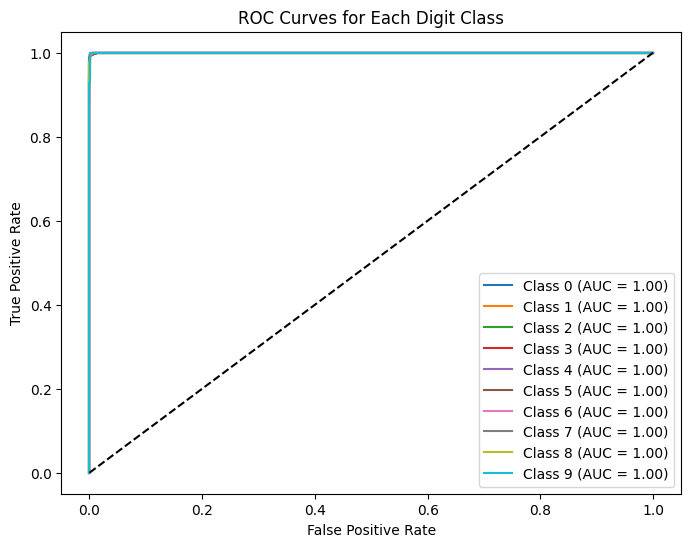

In [ ]:
from sklearn.preprocessing import label_binarize

# Binarize the labels for multi-class ROC
y_test_bin = label_binarize(y_true_classes, classes=np.arange(10))
y_pred_bin = label_binarize(y_pred_classes, classes=np.arange(10))

# Compute ROC curve and AUC for each class
fpr, tpr, roc_auc = {}, {}, {}
for i in range(10):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_pred_probs[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curves for all classes
plt.figure(figsize=(8,6))
for i in range(10):
    plt.plot(fpr[i], tpr[i], label=f'Class {i} (AUC = {roc_auc[i]:.2f})')

plt.plot([0,1], [0,1], 'k--')  # Diagonal line for random classifier
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Each Digit Class')
plt.legend(loc='lower right')
plt.show()

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
cifar10 = keras.datasets.cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

x_train, x_test = x_train / 255.0, x_test / 255.0

# (one-hot encoding)
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

print(f"Training Data Shape: {x_train.shape}, Labels: {y_train.shape}")
print(f"Testing Data Shape: {x_test.shape}, Labels: {y_test.shape}")

Training Data Shape: (50000, 32, 32, 3), Labels: (50000, 10)
Testing Data Shape: (10000, 32, 32, 3), Labels: (10000, 10)


In [ ]:
model = Sequential([
    Conv2D(32, kernel_size=(3,3), activation='relu', padding='same', input_shape=(32,32,3)),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2,2)),

    Conv2D(64, kernel_size=(3,3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2,2)),

    Conv2D(128, kernel_size=(3,3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2,2)),

    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')  # Output layer for 10 classes
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Print model summary
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 32, 32, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 32, 32, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 16, 16, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 16, 16, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 8, 8, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 8, 8, 128)           │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 4, 4, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 256)                 │         524,544 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 652,874 (2.49 MB)

 Trainable params: 652,426 (2.49 MB)

 Non-trainable params: 448 (1.75 KB)

In [ ]:
# Train model with 80-20 train-test split
history = model.fit(x_train, y_train, epochs=20, batch_size=64, validation_data=(x_test, y_test))

Epoch 1/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 224s 220ms/step - accuracy: 0.2640 - loss: 2.1197 - val_accuracy: 0.4752 - val_loss: 1.4948
Epoch 2/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 195s 211ms/step - accuracy: 0.4963 - loss: 1.4055 - val_accuracy: 0.5827 - val_loss: 1.1702
Epoch 3/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 207s 218ms/step - accuracy: 0.5983 - loss: 1.1667 - val_accuracy: 0.5054 - val_loss: 1.3174
Epoch 4/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 198s 212ms/step - accuracy: 0.6523 - loss: 1.0190 - val_accuracy: 0.5444 - val_loss: 1.3400
Epoch 5/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 162s 208ms/step - accuracy: 0.6894 - loss: 0.9240 - val_accuracy: 0.6458 - val_loss: 1.0356
Epoch 6/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 200s 206ms/step - accuracy: 0.7185 - loss: 0.8382 - val_accuracy: 0.7168 - val_loss: 0.8683
Epoch 7/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 207s 212ms/step - accuracy: 0.7422 - loss: 0.7749 - val_accuracy: 0.7221 - val_loss: 0.8253
Epoch 8/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 164s 210ms/step - accuracy: 0.7627 -

In [ ]:
# Predict on test set
y_pred_probs = model.predict(x_test)  # Get class probabilities
y_pred_classes = np.argmax(y_pred_probs, axis=1)  # Convert probabilities to class labels
y_true_classes = np.argmax(y_test, axis=1)  # Convert one-hot labels to class labels

# Calculate evaluation metrics
accuracy = accuracy_score(y_true_classes, y_pred_classes)
precision = precision_score(y_true_classes, y_pred_classes, average='macro')
recall = recall_score(y_true_classes, y_pred_classes, average='macro')
f1 = f1_score(y_true_classes, y_pred_classes, average='macro')

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 10s 30ms/step
Accuracy: 0.7516
Precision: 0.7639
Recall: 0.7516
F1 Score: 0.7524


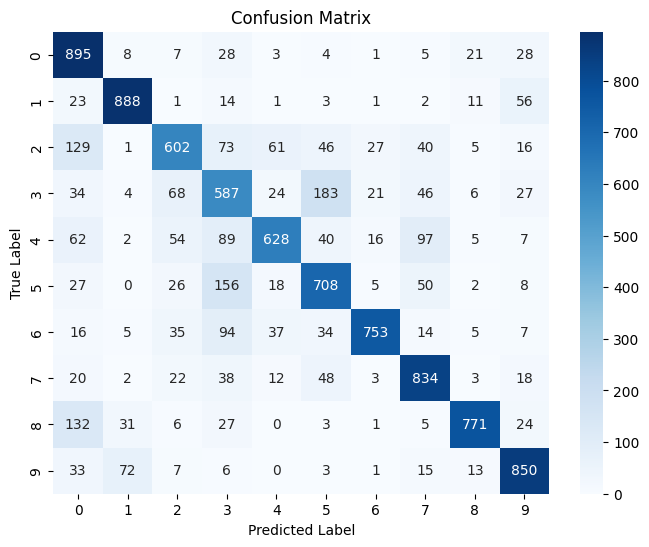

In [ ]:
# Compute confusion matrix
conf_matrix = confusion_matrix(y_true_classes, y_pred_classes)

# Plot confusion matrix
plt.figure(figsize=(8,6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d', xticklabels=range(10), yticklabels=range(10))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

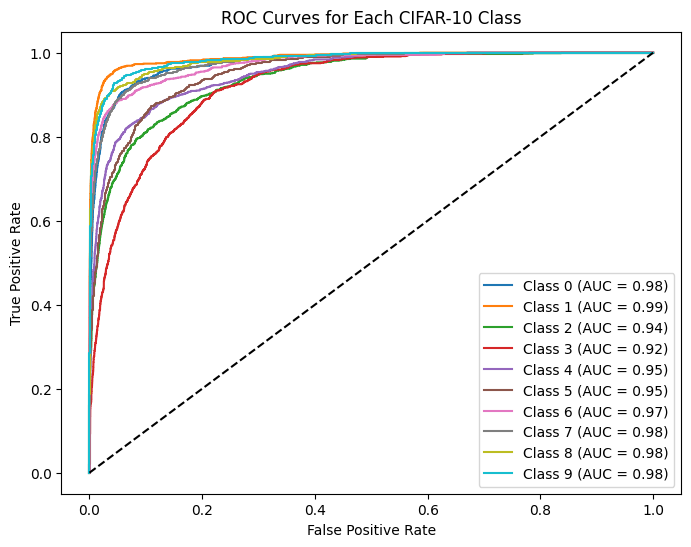

In [ ]:
from sklearn.preprocessing import label_binarize

# Binarize the labels for multi-class ROC
y_test_bin = label_binarize(y_true_classes, classes=np.arange(10))
y_pred_bin = label_binarize(y_pred_classes, classes=np.arange(10))

# Compute ROC curve and AUC for each class
fpr, tpr, roc_auc = {}, {}, {}
for i in range(10):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_pred_probs[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curves for all classes
plt.figure(figsize=(8,6))
for i in range(10):
    plt.plot(fpr[i], tpr[i], label=f'Class {i} (AUC = {roc_auc[i]:.2f})')

plt.plot([0,1], [0,1], 'k--')  # Diagonal line for random classifier
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Each CIFAR-10 Class')
plt.legend(loc='lower right')
plt.show()